In [20]:
#import data of colleges
import pandas as pd

most_recent_df = pd.read_csv(r'C:\Users\Jon\Documents\SpringBoard_Projects\Wrangling\CollegeScorecard_Raw_Data\Most-Recent-Cohorts-All-Data-Elements.csv',
                            low_memory=False)
print(most_recent_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7593 entries, 0 to 7592
Columns: 1825 entries, UNITID to TRANS_L4_POOLED_SUPP
dtypes: float64(518), int64(13), object(1294)
memory usage: 105.7+ MB
None


In [21]:
print(most_recent_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7593 entries, 0 to 7592
Columns: 1825 entries, UNITID to TRANS_L4_POOLED_SUPP
dtypes: float64(518), int64(13), object(1294)
memory usage: 105.7+ MB
None


In [23]:
#Determine which academic categories are most popular among students on average
aca_categories = ['PCIP01','PCIP03','PCIP04','PCIP05','PCIP09','PCIP10', 'PCIP11','PCIP12','PCIP13','PCIP14','PCIP15','PCIP16',
                  'PCIP19','PCIP22','PCIP23','PCIP24','PCIP25','PCIP26','PCIP27','PCIP29','PCIP30','PCIP31','PCIP38','PCIP39',
                  'PCIP40','PCIP41','PCIP42','PCIP43','PCIP44','PCIP45','PCIP46','PCIP47','PCIP48','PCIP49','PCIP50','PCIP51',
                  'PCIP52','PCIP54']
print(most_recent_df[aca_categories].mean().sort_values(ascending=False))

PCIP51    0.267433
PCIP12    0.216386
PCIP52    0.093069
PCIP24    0.056326
PCIP50    0.033935
PCIP11    0.029879
PCIP47    0.027735
PCIP39    0.024615
PCIP43    0.024416
PCIP15    0.021702
PCIP13    0.020793
PCIP42    0.018743
PCIP45    0.016012
PCIP26    0.015174
PCIP09    0.012538
PCIP48    0.011659
PCIP31    0.010158
PCIP46    0.008907
PCIP30    0.008879
PCIP14    0.008645
PCIP49    0.008408
PCIP44    0.007020
PCIP23    0.007003
PCIP19    0.006377
PCIP10    0.005742
PCIP22    0.005620
PCIP38    0.004599
PCIP40    0.004161
PCIP01    0.004124
PCIP54    0.003838
PCIP27    0.002867
PCIP03    0.002848
PCIP16    0.002528
PCIP04    0.001295
PCIP05    0.001206
PCIP41    0.000652
PCIP29    0.000136
PCIP25    0.000051
dtype: float64


In [24]:
#Determine which academic categories are most popular among students at four year universities 
aca_mn_df = most_recent_df[most_recent_df['COSTT4_A'].notnull()]
print(aca_mn_df[aca_categories].mean().sort_values(ascending=False))

PCIP51    0.221643
PCIP52    0.140586
PCIP24    0.096782
PCIP50    0.052086
PCIP11    0.042175
PCIP39    0.036761
PCIP43    0.036133
PCIP13    0.034072
PCIP42    0.031094
PCIP15    0.030477
PCIP45    0.027463
PCIP12    0.025591
PCIP26    0.025581
PCIP47    0.021632
PCIP09    0.017405
PCIP14    0.014711
PCIP31    0.014577
PCIP30    0.014556
PCIP44    0.011264
PCIP23    0.010922
PCIP48    0.010113
PCIP19    0.009302
PCIP46    0.007487
PCIP22    0.007438
PCIP40    0.007228
PCIP38    0.006821
PCIP54    0.006663
PCIP49    0.006553
PCIP01    0.006006
PCIP10    0.005369
PCIP27    0.004951
PCIP03    0.004950
PCIP16    0.004164
PCIP04    0.002253
PCIP05    0.002102
PCIP41    0.000985
PCIP29    0.000229
PCIP25    0.000088
dtype: float64


In [25]:
#create test dataframe with ID, Name, Admission Rate, Graduation Debt Median, completion %, Avg cost, Avg SAT, mean earnings, and 5 academic categories
#remove rows that are not four year universities
draft_df = most_recent_df[['UNITID','INSTNM','ADM_RATE','GRAD_DEBT_MDN','C150_4','COSTT4_A','UGDS','SAT_AVG','MN_EARN_WNE_P6','PCIP52','PCIP51','PCIP50','PCIP11','PCIP24']]
draft_df = draft_df[draft_df['COSTT4_A'].notnull()]
print(draft_df.head())

   UNITID                               INSTNM  ADM_RATE GRAD_DEBT_MDN  \
0  100654             Alabama A & M University    0.6538         35000   
1  100663  University of Alabama at Birmingham    0.6043         21500   
2  100690                   Amridge University       NaN         23000   
3  100706  University of Alabama in Huntsville    0.8120         23500   
4  100724             Alabama State University    0.4639         32091   

   C150_4  COSTT4_A     UGDS  SAT_AVG MN_EARN_WNE_P6  PCIP52  PCIP51  PCIP50  \
0  0.3081   20809.0   4505.0    850.0          27200  0.1479  0.0000  0.0258   
1  0.5462   22232.0  11269.0   1147.0          38300  0.1837  0.2231  0.0376   
2  0.4000   12133.0    308.0      NaN          40000  0.3962  0.0000  0.0000   
3  0.4935   20999.0   5829.0   1221.0          39200  0.2072  0.1892  0.0288   
4  0.2696   18100.0   4740.0    844.0          23100  0.0983  0.0926  0.0473   

   PCIP11  PCIP24  
0  0.0634  0.0423  
1  0.0133  0.0179  
2  0.0000  0.0

In [26]:
#convert columns to more readable names, convert object columns to float, remove rows missing our target variable
col_names_dict = {'UNITID': 'InstitutionID','INSTNM':'Name','ADM_RATE':'Admission%','GRAD_DEBT_MDN':'MedianDebt',
             'C150_4':'Completion%','COSTT4_A':'AvgCost','UGDS':'StudentPop','SAT_AVG':'AvgSAT',
             'MN_EARN_WNE_P6':'AvgEarnings','PCIP52':'BusinessMarketing%','PCIP51':'Health%','PCIP50':'VisualPerformingArts%',
             'PCIP24':'Humanities%','PCIP11':'ComputerScience%'}
draft_df = draft_df.rename(columns=col_names_dict)
draft_df['AvgEarnings'] = pd.to_numeric(draft_df['AvgEarnings'], errors = 'coerce')
draft_df['MedianDebt'] = pd.to_numeric(draft_df['MedianDebt'], errors = 'coerce')
draft_df = draft_df[draft_df['AvgEarnings'].notnull()]
print(draft_df.columns)

Index(['InstitutionID', 'Name', 'Admission%', 'MedianDebt', 'Completion%',
       'AvgCost', 'StudentPop', 'AvgSAT', 'AvgEarnings', 'BusinessMarketing%',
       'Health%', 'VisualPerformingArts%', 'ComputerScience%', 'Humanities%'],
      dtype='object')


In [27]:
#import matplotlib.pyplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

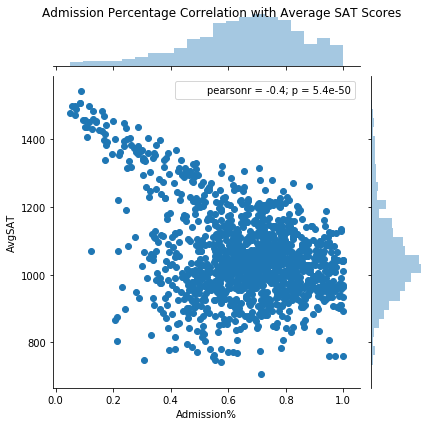

In [28]:
#plotting admission vs SAT
sns.jointplot(x='Admission%',y='AvgSAT',data=draft_df)
plt.suptitle('Admission Percentage Correlation with Average SAT Scores')
plt.show()

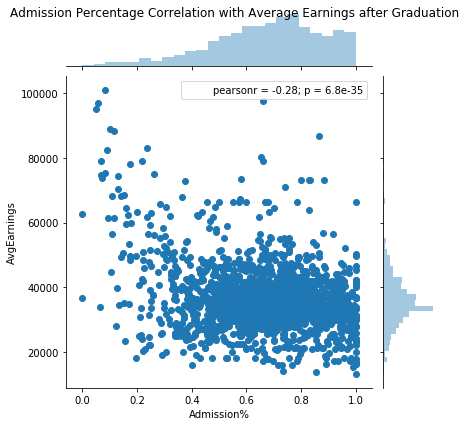

In [29]:
#plotting admission vs earnings
sns.jointplot(x='Admission%',y='AvgEarnings',data=draft_df)
plt.suptitle('Admission Percentage Correlation with Average Earnings after Graduation')
plt.show()

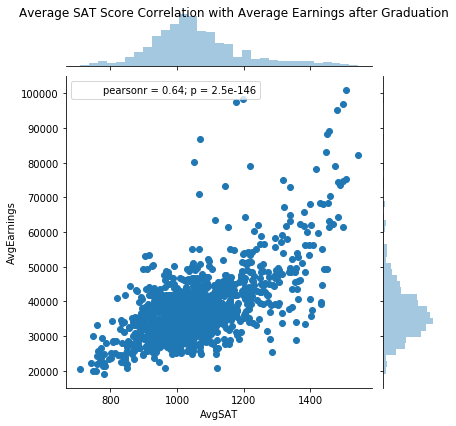

In [30]:
#plotting SAT and Earnings
sns.jointplot(x='AvgSAT',y='AvgEarnings',data=draft_df)
plt.suptitle('Average SAT Score Correlation with Average Earnings after Graduation')
plt.show()

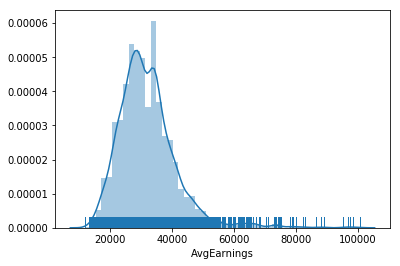

In [31]:
#histogram of target variable
sns.distplot(draft_df['AvgEarnings'],kde='False',rug='True')
plt.show()

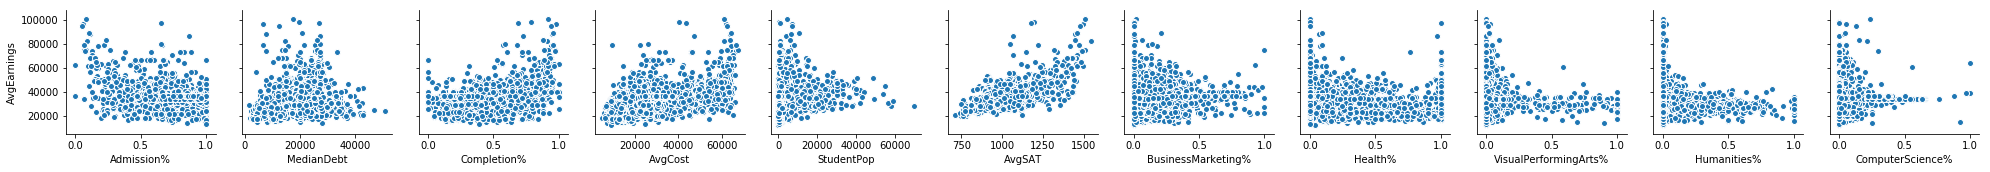

In [34]:
#plotting our target (earnings) vs all other relevant columns
sns.pairplot(draft_df,y_vars = 'AvgEarnings',x_vars=['Admission%', 'MedianDebt', 'Completion%',
       'AvgCost', 'StudentPop', 'AvgSAT', 'BusinessMarketing%',
       'Health%', 'VisualPerformingArts%', 'Humanities%','ComputerScience%'])
plt.show()

In [35]:
#Create flags for rows with SAT and admissions percentage, create a second dataframe with only rows containing the SAT scores
import numpy as np
draft_df['hasSATscore'] = np.where(draft_df['AvgSAT'].isnull(), 0, 1)
draft_df['hasAdmission%'] = np.where(draft_df['Admission%'].isnull(), 0, 1)
SAT_df = draft_df[draft_df['hasSATscore'] == 1]
SAT_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 6866
Data columns (total 16 columns):
InstitutionID            1251 non-null int64
Name                     1251 non-null object
Admission%               1250 non-null float64
MedianDebt               1242 non-null float64
Completion%              1222 non-null float64
AvgCost                  1251 non-null float64
StudentPop               1251 non-null float64
AvgSAT                   1251 non-null float64
AvgEarnings              1251 non-null float64
BusinessMarketing%       1251 non-null float64
Health%                  1251 non-null float64
VisualPerformingArts%    1251 non-null float64
ComputerScience%         1251 non-null float64
Humanities%              1251 non-null float64
hasSATscore              1251 non-null int32
hasAdmission%            1251 non-null int32
dtypes: float64(12), int32(2), int64(1), object(1)
memory usage: 156.4+ KB


In [36]:
#compare average earnings between the two dataframes
print(SAT_df['AvgEarnings'].mean())
print(draft_df['AvgEarnings'].mean())

37874.10071942446
32112.755383765874
